## 네이버 연관검색어 가져오기

In [ ]:
import requests # 1단계 : html 찾기
from bs4 import BeautifulSoup # 2단계 : 태그 찾기

In [ ]:
# html 찾기
# 어디서 요청할거야?
# 1. 네이버 접속 -> 2. 코로나 검색한다. -> 3. 뉴스 페이지로 이동
# 해당 url을 복사 붙여넣기한다.
url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EC%BD%94%EB%A1%9C%EB%82%98'

resp = requests.get(url) # 해당 url의 html이 resp에 들어간다.

# 제대로 html 가져왔는지 확인
resp

<Response [200]>

< 응답코드 >  
- 200 : 요청 성공
- 404 : 요청 실패

In [ ]:
resp.content

b'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="\xec\xbd\x94\xeb\xa1\x9c\xeb\x82\x98 : \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\x89\xb4\xec\x8a\xa4\xea\xb2\x80\xec\x83\x89"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'\xec\xbd\x94\xeb\xa1\x9c\xeb\x82\x98\'\xec\x9d\x98 \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\x89\xb4\xec\x8a\xa4\xea\xb2\x80\xec\x83\x89 \xea\xb2\xb0\xea\xb3\xbc\xec\x9e\x85\xeb\x8b\x88\xeb\x8b\xa4."> <meta name="description" lang="ko" content="\'\xec\xbd\x94\xeb\xa1\x9c\xeb\x82\x98\'\xec\x9d\x98 \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\x89\xb4\xec\x8a\xa4\xea\xb2\x80\xec\x83\x89 \xea\xb2\xb0\xea\xb3\xbc\xec\x9e\x85\xeb\x8b\x88\

In [ ]:
# 태그 찾기
# 뭐 찾을거야?
# 1. html을 BeautifulSoup 형태로 바꿔준다. -> 2. select 함수를 이용해 파싱한다.
soup = BeautifulSoup(resp.content, 'lxml') # soup == resp.content == html == 해당 웹페이지
# soup.select('a')

< select >  
해당 태그를 전부 다 찾아서, 리스트로 반환한다.  
해당태그가 1개 였다면?   
그래도 리스트로 반환한다.(원소가 1개인 리스트)  
  
해당태그가 없다면?  
그래도 리스트로 반환한다.(빈리스트) 

In [ ]:
# 리스트 이해하기
a = ['부산', '해운대구', '센텀'] # 길이가 3개인 리스트
b = ['부산'] # 길이가 1개인 리스트
c = [] # 빈리스트

In [ ]:
# soup.select('dl dt a') # 태그의 계층 구조를 수식할 때는 스페이스로 구분한다.

< 태그 찾기의 핵심 >  
유니크한 조상님 찾기!  
  
유니크한 속성을 가진 조상 태그  
  
속성들이 어떤 것들이 있지?  
class, onclick, href, title, target 등등..  
  
수식어로서 매우매우 가치가 높은 유니크한 속성으로는  
**class**와 **id**가 있다.
  

유니크한 조상님 활용하기 == class 또는 id 속성을 가지고 있는 조상님 활용하기

< 요긴한 속성만의 혜택 >  
class : .을 이용해 수식 가능  
id : #을 이용해 수식 가능  
  
ex) class가 type01인 ul 태그 == ul.type01  
id가 sp_nws1인 li 태그 == li#sp_nws1


In [ ]:
# 연습하기 : 연관검색어 중 코로나 백신 만 가져오기
soup.select('div.tit')[3].text

# soup.select('a.href="?where=news&query=%EC%BD%94%EB%A1%9C%EB%82%98+%EB%B0%B1%EC%8B%A0&ie=utf8&sm=tab_she&qdt=0" div.tit')

'코로나 백신'

In [ ]:
# 연관검색어 10개 모두가져오기
soup.select('div.tit')[1:]

[<div class="tit">코로나 2.5단계 연장</div>,
 <div class="tit">코로나 라이브</div>,
 <div class="tit">코로나 백신</div>,
 <div class="tit">코로나 1.5단계</div>,
 <div class="tit">코로나 단계</div>,
 <div class="tit">코로나 확진자</div>,
 <div class="tit">사회적 거리두기</div>,
 <div class="tit">코로나 1.5단계 기준</div>,
 <div class="tit">코로나 2단계</div>,
 <div class="tit">미국 코로나</div>]

In [ ]:
# 반복문 연습
과일s = ['사과', '바나나', '딸기']

for 과일 in 과일s:
    print(과일, '맛있어')

사과 맛있어
바나나 맛있어
딸기 맛있어


In [ ]:
# len(soup.select('ul.lst_related_srch'))

relateds = soup.select('ul.lst_related_srch div.tit')

for related in relateds:
    print(related.text)

코로나 2.5단계 연장
코로나 라이브
코로나 백신
코로나 1.5단계
코로나 단계
코로나 확진자
사회적 거리두기
코로나 1.5단계 기준
코로나 2단계
미국 코로나


## 네이버 기사 정보 가져오기

In [ ]:
# 기사제목과 함께 기사제목의 url도 가져와보세요
titles = []
urls = []
for a_tag in a_tags:
    # print(a_tag['title'])
    # print(a_tag['href'])
    titles.append(a_tag['title'])
    urls.append(a_tag['href'])

In [ ]:
print(titles)
print(urls)

['코로나19 백신 연내접종 예고…내년엔 여러 종류 등장할 듯', "[단독]'미스터트롯' 서울 콘서트, 또 연기됐다…이번에도 코로나19 여파", '文대통령, 20~22일 APEC·G20 연쇄참석…코로나 공조 강조(상보)', '삼바, 美 일라이릴리 코로나19 치료제 생산', '삼성바이오, 美릴리와 손잡고 코로나19 치료제 생산', '모더나 백신 임상결과 발표…“코로나19 예방 효과 94.5%”', '모더나 "코로나 백신, 예방효과 94.5%...이르면 연내 접종 시작"', 'WHO "북한 코로나19 의심 증상자, 일주일만에 805명 늘어"', '코로나 신규확진 230명, 나흘째 200명대… 수도권 1.5단계 격상(종합)', '[오피셜] 수아레스, 코로나19 확진...브라질-바르사와 맞대결 불발']
['http://yna.kr/AKR20201117061300009?did=1195m', 'http://www.spotvnews.co.kr/?mod=news&act=articleView&idxno=390388', 'http://www.edaily.co.kr/news/newspath.asp?newsid=03817926625966704', 'https://www.sedaily.com/NewsView/1ZAFXV97ZZ', 'http://www.fnnews.com/news/202011170914546107', 'http://news.kbs.co.kr/news/view.do?ncd=5049611&ref=A', 'https://www.ytn.co.kr/_ln/0104_202011170414257079', 'https://imnews.imbc.com/news/2020/world/article/5977120_32640.html', 'https://biz.chosun.com/site/data/html_dir/2020/11/17/2020111700780.html?utm_source=naver&utm_medium=original&utm_campaign=biz', 'http://www.in

In [ ]:
news = [titles, urls]
news[0], news[1] # 제목은 0번째, url은 1번째라는 걸 기억해야하는 불편함이 있다.

news = {'title' : titles, 'url' : urls}

news['title'], news['url']

(['코로나19 백신 연내접종 예고…내년엔 여러 종류 등장할 듯',
  "[단독]'미스터트롯' 서울 콘서트, 또 연기됐다…이번에도 코로나19 여파",
  '文대통령, 20~22일 APEC·G20 연쇄참석…코로나 공조 강조(상보)',
  '삼바, 美 일라이릴리 코로나19 치료제 생산',
  '삼성바이오, 美릴리와 손잡고 코로나19 치료제 생산',
  '모더나 백신 임상결과 발표…“코로나19 예방 효과 94.5%”',
  '모더나 "코로나 백신, 예방효과 94.5%...이르면 연내 접종 시작"',
  'WHO "북한 코로나19 의심 증상자, 일주일만에 805명 늘어"',
  '코로나 신규확진 230명, 나흘째 200명대… 수도권 1.5단계 격상(종합)',
  '[오피셜] 수아레스, 코로나19 확진...브라질-바르사와 맞대결 불발'],
 ['http://yna.kr/AKR20201117061300009?did=1195m',
  'http://www.spotvnews.co.kr/?mod=news&act=articleView&idxno=390388',
  'http://www.edaily.co.kr/news/newspath.asp?newsid=03817926625966704',
  'https://www.sedaily.com/NewsView/1ZAFXV97ZZ',
  'http://www.fnnews.com/news/202011170914546107',
  'http://news.kbs.co.kr/news/view.do?ncd=5049611&ref=A',
  'https://www.ytn.co.kr/_ln/0104_202011170414257079',
  'https://imnews.imbc.com/news/2020/world/article/5977120_32640.html',
  'https://biz.chosun.com/site/data/html_dir/2020/11/17/2020111700780.html?utm_source=naver&utm_medium=origi

In [ ]:
# 뉴스 기사글 가져오기
# for url in news['url']:
#     resp = requests.get(url)

#     soup = BeautifulSoup(resp.content, 'lxml')
#     soup.select()

## 네이버 뉴스토픽 가져오기

In [ ]:
# 뉴스토픽 20개 가져와보세요
len(soup.select('div.list_wrap._content'))

len(soup.select('div.list_wrap._content ol'))

topic_tags = soup.select('div.list_wrap._content ol li a')
len(topic_tags)

for topic_tag in topic_tags:
    print(topic_tag.text)

근본적 검토 필요
부모 찬스
김해신공항 검증위
김해신공항 사실상 백지화
인천은 23일부터
초과 유보소득 과세 반대
불공정약관 시정
검증위 사실상 백지화
1.5단계 격상
거리두기 격상
허쉬 임윤아
한지민 남주혁
아내의 맛 함소원
라이브온 황민현
인턴 기자증 공개
스포티파이 4억 스트리밍
롤모델은 블랙핑크
라스 박미선
조제 김종관 감독
퓨처스리그 재개


In [ ]:
topics = {'뉴스' : [], '연애스포츠' : []}

topics['뉴스'], topics['연애스포츠']

([], [])

In [ ]:
# 반복문 : enumerate, zip
nums = [10, 20, 30]
movies = ['삼진그룹', '어벤져스', '이터널선샤인']

for idx, num in enumerate(nums):
    print(idx, num)

for num, movie in zip(nums, movies):
    print(num, movie)

0 10
1 20
2 30
10 삼진그룹
20 어벤져스
30 이터널선샤인


In [ ]:
# 딕셔너리

topics = {}

topics['뉴스'] = []
topics['연애스포츠'] = []

topics

{'뉴스': [], '연애스포츠': []}

In [ ]:
div_tags = soup.select('div.list_wrap._content')
# len(div_tags)

titles = ['뉴스', '연애스포츠']
topics = {}


for idx, div_tag in enumerate(div_tags):
    # print(len(div_tag.select('ol a')))
    topic_tags = div_tag.select('ol a')

    topics[titles[idx]] = []
    for topic_tag in topic_tags:
        # print(topic_tag.text)
        topics[titles[idx]].append(topic_tag.text)

topics['뉴스'], topics['연애스포츠']

(['근본적 검토 필요',
  '부모 찬스',
  '김해신공항 검증위',
  '김해신공항 사실상 백지화',
  '인천은 23일부터',
  '초과 유보소득 과세 반대',
  '불공정약관 시정',
  '검증위 사실상 백지화',
  '1.5단계 격상',
  '거리두기 격상'],
 ['허쉬 임윤아',
  '한지민 남주혁',
  '아내의 맛 함소원',
  '라이브온 황민현',
  '인턴 기자증 공개',
  '스포티파이 4억 스트리밍',
  '롤모델은 블랙핑크',
  '라스 박미선',
  '조제 김종관 감독',
  '퓨처스리그 재개'])

## 네이버 웹툰 정보 가져오기

In [ ]:
# 네이버 웹툰 이름, 작가, 평점 가져오기
url = 'https://comic.naver.com/webtoon/weekdayList.nhn?week=tue'

resp = requests.get(url)
resp

<Response [200]>

In [ ]:
soup = BeautifulSoup(resp.content, 'lxml')
title_tags = soup.select('ul.img_list li dl dt a')
author_tags = soup.select('ul.img_list li dl dd.desc a')
rating_tags = soup.select('ul.img_list li dl div.rating_type strong')
len(title_tags), len(author_tags), len(rating_tags)

(53, 53, 53)

In [ ]:
for title_tag, author_tag, rating_tag in zip(title_tags, author_tags, rating_tags):
    print(title_tag['title'], author_tag.text, rating_tag.text)

여신강림 야옹이 9.65
관계의 종말 김용키 9.71
한림체육관 혜성 / 이석재 9.72
바른연애 길잡이 남수 9.97
랜덤채팅의 그녀! 박은혁 9.71
후기 조석 9.95
하루만 네가 되고 싶어 삼 9.98
사신소년 류 9.92
헬58 장성준 9.94
신도림 오세형 9.96
성인초딩 미티 9.51
중증외상센터 : 골든 아워 한산이가 / 홍비치라 9.97
호랑이 들어와요 배세혁 / 유은 9.92
삼국지톡 무적핑크 / 이리 9.94
아이레 설이 / Team 설이 9.62
원주민 공포만화 원주민 9.91
달콤살벌한 부부 플라비 / 장그린 9.91
오늘의 순정망화 손하기 9.98
집이 없어 와난 9.95
윌유메리미 마인드C 9.93
악마와 계약연애 장진 / 움비 9.98
체크포인트 송가 / 은소 9.96
땅 보고 걷는 아이 다온 9.95
견우와 선녀 안수민 9.97
빅맨 하하영 9.74
오피스 누나 이야기 김자네 / 와삭바삭 9.72
용왕님의 셰프가 되었습니다 문백경 / 카라쿨 9.98
신의 언어 장래혁 9.73
사이드킥 2~3 신의철 9.97
정년이 서이레 / 나몬 9.98
플레이, 플리 이에프 9.96
올가미 해무리 9.96
연우의 순정 이솔 9.95
은주의 방 2~3부 노란구미 9.94
그놈은 흑염룡 혜진양 9.97
한강예찬 김8 9.93
오파츠 성진 / 부겸 9.49
별종 이무기 9.94
완벽한 가족 냥빠 / 주은 9.93
숲속의 담 다홍 9.98
제로게임 즐바센 9.97
자판귀 윤정민 9.95
도를 아십니까 이건 / 요엘 9.89
조선홍보대행사 조대박 김양수 9.86
언메이크 박화랑 9.82
너에게만 보이는 소소만 9.97
그날 죽은 나는 이언 9.97
안식의 밤 연제원 9.93
필살VS로맨스 구르 9.97
아이고 아이고 하모 9.92
저세상 클라스! 꾀돌이 9.96
빛빛빛 수진 9.92
장단에 맞춰줘! 햇님 9.80


In [ ]:
weekday = []

url = 'https://comic.naver.com/webtoon/weekdayList.nhn'
resp = requests.get(url)

soup = BeautifulSoup(resp.content, 'lxml')
weekday_tags = soup.select('ul.category_tab li a')
for weekday_tag in weekday_tags[1:]:
    weekday.append(weekday_tag['href'][-3:])
weekday

['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']

In [ ]:
for day in weekday:
    url = 'https://comic.naver.com/webtoon/weekdayList.nhn?week=' + day

    resp = requests.get(url)

    # print(resp)
    soup = BeautifulSoup(resp.content, 'lxml')

    dl_tags = soup.select('ul.img_list li dl')
    # print(len(dl_tags))
    for dl in dl_tags:
        title = dl.select('dt a')[0]['title']
        author = dl.select('dd.desc a')[0].text
        rating = dl.select('div.rating_type strong')[0].text
        print(title, author, rating)

인생존망 박태준 / 전선욱 9.84
뷰티풀 군바리 설이 / 윤성원 9.82
윈드브레이커 조용석 9.87
바이러스X 준 / 하랑 9.35
소녀의 세계 모랑지 9.97
백수세끼 치즈 9.87
장씨세가 호위무사 조형근 / 김인호 9.97
파이게임 배진수 9.94
참교육 채용택 / 한가람 9.46
앵무살수 김성진 9.97
유일무이 로맨스 두부 9.98
칼가는 소녀 오리 9.97
오늘의 순정망화 손하기 9.98
히어로메이커 빤쓰 9.96
싸이코 리벤지 기송 / 넴가 9.82
왕따협상 아이아리 9.41
요리GO HO9 9.93
결혼생활 그림일기 은꼼지 9.92
아는 여자애 허니비 9.97
사장님을 잠금해제 박성현 9.94
리턴 투 플레이어 인덱스 / 세혼 9.85
삶이 우리를 속일지라도 김지수 9.94
보살님이 캐리해! 성코 / 콩자 9.70
이것도 친구라고 제야 9.96
침범 공세리 / 영영이 9.81
꿈의 기업 문지현 9.97
일진이 사나워 강환영 / 김현아 9.82
이중첩자 피숙혜 / 옆집찰스 9.92
서브 콤플렉스 소이 9.94
평범한 8반 영파카 9.85
와이키키 뱀파이어 요니요니 9.97
정보전사 202 이작가 9.11
도플갱어의 게임 킹스날 / 쥐주 9.94
피플 서승준 / 손창균 9.87
두근두근 네가 좋아서 서혜은 / 박래모 9.93
헬로맨스 이공주 / 하얀독수리 9.66
안녕 나의 모모로 켄타 9.97
지구멸망버튼 박장고 / 신동구 9.70
하슬라 까를로스 / 유상진 9.93
원하는 건 너 하나 달콤J,박성실 / sage 8.71
여기 악마가 있어 맷집왕 9.90
뱀파이어의 꽃 카나리아 / 동물 9.84
인간의 온도 이재익 / 양세준 9.90
부산스런 웹툰 김호드, 김명현 9.87
드로잉 레시피 꼬모소이 9.96
모락모락 왕세자님 원해 9.87
백호랑 박혬 9.92
물레 고긱 9.81
블루투스 국승원 7.56
결백한 사람은 없다 서각 9.85
중독연구소 김택기 9.89
여신강림 야옹이 9.65
관계의 종말 김용키 9.71
한림체육관 혜성 / 이석재 9.

In [ ]:
url = 'https://comic.naver.com/webtoon/weekdayList.nhn'
resp = requests.get(url)

# resp

soup = BeautifulSoup(resp.content, 'lxml')
a_tag = soup.select('ul.category_tab li a')

sub_urls = []
for a in a_tag:
    sub_urls.append(a['href'])
sub_urls

['/webtoon/weekday.nhn',
 '/webtoon/weekdayList.nhn?week=mon',
 '/webtoon/weekdayList.nhn?week=tue',
 '/webtoon/weekdayList.nhn?week=wed',
 '/webtoon/weekdayList.nhn?week=thu',
 '/webtoon/weekdayList.nhn?week=fri',
 '/webtoon/weekdayList.nhn?week=sat',
 '/webtoon/weekdayList.nhn?week=sun']

In [ ]:
toon_list = []
for sub_url in sub_urls[1:]:
    url = 'https://comic.naver.com' + sub_url
    # print(url)

    resp = requests.get(url)
    # print(resp)

    soup = BeautifulSoup(resp.content, 'lxml')
    
    dl_tag = soup.select('ul.img_list li dl')

    for dl in dl_tag:
        toon_dict = {}
        title = dl.select('dt a')[0]['title']
        author = dl.select('dd.desc a')[0].text
        rating = dl.select('div.rating_type strong')[0].text
        # print(title, author, rating)
        toon_dict['title'] = title
        toon_dict['author'] = author
        toon_dict['rating'] = rating
        toon_list.append(toon_dict)

In [ ]:
toon_list

[{'author': '박태준 / 전선욱', 'rating': '9.84', 'title': '인생존망'},
 {'author': '설이 / 윤성원', 'rating': '9.82', 'title': '뷰티풀 군바리'},
 {'author': '조용석', 'rating': '9.87', 'title': '윈드브레이커'},
 {'author': '준 / 하랑', 'rating': '9.35', 'title': '바이러스X'},
 {'author': '모랑지', 'rating': '9.97', 'title': '소녀의 세계'},
 {'author': '치즈', 'rating': '9.87', 'title': '백수세끼'},
 {'author': '조형근 / 김인호', 'rating': '9.97', 'title': '장씨세가 호위무사'},
 {'author': '배진수', 'rating': '9.94', 'title': '파이게임'},
 {'author': '채용택 / 한가람', 'rating': '9.46', 'title': '참교육'},
 {'author': '김성진', 'rating': '9.97', 'title': '앵무살수'},
 {'author': '두부', 'rating': '9.98', 'title': '유일무이 로맨스'},
 {'author': '오리', 'rating': '9.97', 'title': '칼가는 소녀'},
 {'author': '손하기', 'rating': '9.98', 'title': '오늘의 순정망화'},
 {'author': '빤쓰', 'rating': '9.96', 'title': '히어로메이커'},
 {'author': '기송 / 넴가', 'rating': '9.82', 'title': '싸이코 리벤지'},
 {'author': '아이아리', 'rating': '9.41', 'title': '왕따협상'},
 {'author': 'HO9', 'rating': '9.93', 'title': '요리GO'},
 {'author':

In [ ]:
toon_dict = {'title' : [], 'author': [], 'rating': []}
for sub_url in sub_urls[1:]:
    url = 'https://comic.naver.com' + sub_url
    # print(url)

    resp = requests.get(url)
    # print(resp)

    soup = BeautifulSoup(resp.content, 'lxml')
    
    dl_tag = soup.select('ul.img_list li dl')

    for dl in dl_tag:
        title = dl.select('dt a')[0]['title']
        author = dl.select('dd.desc a')[0].text
        rating = dl.select('div.rating_type strong')[0].text
        toon_dict['title'].append(title)
        toon_dict['author'].append(author)
        toon_dict['rating'].append(rating)
toon_dict

{'author': ['박태준 / 전선욱',
  '설이 / 윤성원',
  '조용석',
  '준 / 하랑',
  '모랑지',
  '치즈',
  '조형근 / 김인호',
  '배진수',
  '채용택 / 한가람',
  '김성진',
  '두부',
  '오리',
  '손하기',
  '빤쓰',
  '기송 / 넴가',
  '아이아리',
  'HO9',
  '은꼼지',
  '허니비',
  '박성현',
  '인덱스 / 세혼',
  '김지수',
  '성코 / 콩자',
  '제야',
  '공세리 / 영영이',
  '문지현',
  '강환영 / 김현아',
  '피숙혜 / 옆집찰스',
  '소이',
  '영파카',
  '요니요니',
  '이작가',
  '킹스날 / 쥐주',
  '서승준 / 손창균',
  '서혜은 / 박래모',
  '이공주 / 하얀독수리',
  '켄타',
  '박장고 / 신동구',
  '까를로스 / 유상진',
  '달콤J,박성실 / sage',
  '맷집왕',
  '카나리아 / 동물',
  '이재익 / 양세준',
  '김호드, 김명현',
  '꼬모소이',
  '원해',
  '박혬',
  '고긱',
  '국승원',
  '서각',
  '김택기',
  '야옹이',
  '김용키',
  '혜성 / 이석재',
  '남수',
  '박은혁',
  '조석',
  '삼',
  '류',
  '장성준',
  '오세형',
  '미티',
  '한산이가 / 홍비치라',
  '배세혁 / 유은',
  '무적핑크 / 이리',
  '설이 / Team 설이',
  '원주민',
  '플라비 / 장그린',
  '손하기',
  '와난',
  '마인드C',
  '장진 / 움비',
  '송가 / 은소',
  '다온',
  '안수민',
  '하하영',
  '김자네 / 와삭바삭',
  '문백경 / 카라쿨',
  '장래혁',
  '신의철',
  '서이레 / 나몬',
  '이에프',
  '해무리',
  '이솔',
  '노란구미',
  '혜진양',
  '김8',
  '성진 / 부겸',
  '이무기',
  '냥빠 / 주은',


In [ ]:
import pandas as pd
df_toon = pd.DataFrame(toon_list)
df_toon

,title,author,rating
0,인생존망,박태준 / 전선욱,9.84
1,뷰티풀 군바리,설이 / 윤성원,9.82
2,윈드브레이커,조용석,9.87
3,바이러스X,준 / 하랑,9.35
4,소녀의 세계,모랑지,9.97
...,...,...,...
360,여름은 뜨겁다,JQ / ZK,9.17
361,위험한 신입사원,박수정 / Jiya,9.65
362,죽여주는 탐정님,뻥 / 조은,9.86
363,불발소년,곤세,9.84


In [ ]:
df_toon = pd.DataFrame(toon_dict)
df_toon

,title,author,rating
0,인생존망,박태준 / 전선욱,9.84
1,뷰티풀 군바리,설이 / 윤성원,9.82
2,윈드브레이커,조용석,9.87
3,바이러스X,준 / 하랑,9.35
4,소녀의 세계,모랑지,9.97
...,...,...,...
360,여름은 뜨겁다,JQ / ZK,9.17
361,위험한 신입사원,박수정 / Jiya,9.65
362,죽여주는 탐정님,뻥 / 조은,9.86
363,불발소년,곤세,9.84


In [ ]:
df_toon.head()

,title,author,rating
0,인생존망,박태준 / 전선욱,9.84
1,뷰티풀 군바리,설이 / 윤성원,9.82
2,윈드브레이커,조용석,9.87
3,바이러스X,준 / 하랑,9.35
4,소녀의 세계,모랑지,9.97


In [ ]:
df_toon.tail()

,title,author,rating
360,여름은 뜨겁다,JQ / ZK,9.17
361,위험한 신입사원,박수정 / Jiya,9.65
362,죽여주는 탐정님,뻥 / 조은,9.86
363,불발소년,곤세,9.84
364,선녀야 야옹해봐!,햄톨탱크,9.77


In [ ]:
df_toon.loc[5:10]

,title,author,rating
5,백수세끼,치즈,9.87
6,장씨세가 호위무사,조형근 / 김인호,9.97
7,파이게임,배진수,9.94
8,참교육,채용택 / 한가람,9.46
9,앵무살수,김성진,9.97
10,유일무이 로맨스,두부,9.98


In [ ]:
df_toon[['title', 'rating']]

,title,rating
0,인생존망,9.84
1,뷰티풀 군바리,9.82
2,윈드브레이커,9.87
3,바이러스X,9.35
4,소녀의 세계,9.97
...,...,...
360,여름은 뜨겁다,9.17
361,위험한 신입사원,9.65
362,죽여주는 탐정님,9.86
363,불발소년,9.84


In [ ]:
df_toon['rating'].astype('f').describe()

count    365.000000
mean       9.819328
std        0.364101
min        6.780000
25%        9.830000
50%        9.930000
75%        9.960000
max        9.980000
Name: rating, dtype: float64

In [ ]:
df_toon.to_excel('toon.xlsx', index=False)

In [ ]:
df_toon_2 = pd.read_excel('toon.xlsx', index_col='title')
df_toon_2.head()

,author,rating
title,,
인생존망,박태준 / 전선욱,9.84
뷰티풀 군바리,설이 / 윤성원,9.82
윈드브레이커,조용석,9.87
바이러스X,준 / 하랑,9.35
소녀의 세계,모랑지,9.97


In [ ]:
df_toon_2.loc['감히': '트럼프']

,author,rating
title,,


## 웹툰 이미지 가져오기

In [ ]:
# 이미지 가져오기

#1단계 : 이미지 src url 가져오기
url = 'https://comic.naver.com/webtoon/weekdayList.nhn?week=mon'
resp =requests.get(url)
# resp

soup = BeautifulSoup(resp.content, 'lxml')
img_tag = soup.select('ul.img_list div.thumb img')
img_src = []
for img in img_tag:
    img_src.append(img['src'])
len(img_src)

51

In [ ]:
#2단계 : 이미지 src url에서 이미지 가져오기
for idx, src in enumerate(img_src):
    resp = requests.get(src)
    print(resp.content)

    with open('thumb_{:03}.jpg'.format(idx), 'wb') as f:
        f.write(resp.content)

b'\xff\xd8\xff\xe1\x00\x18Exif\x00\x00II*\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xec\x00\x11Ducky\x00\x01\x00\x04\x00\x00\x00d\x00\x00\xff\xe1\x03\x8dhttp://ns.adobe.com/xap/1.0/\x00<?xpacket begin="\xef\xbb\xbf" id="W5M0MpCehiHzreSzNTczkc9d"?> <x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="Adobe XMP Core 5.6-c145 79.163499, 2018/08/13-16:40:22        "> <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"> <rdf:Description rdf:about="" xmlns:xmpMM="http://ns.adobe.com/xap/1.0/mm/" xmlns:stRef="http://ns.adobe.com/xap/1.0/sType/ResourceRef#" xmlns:xmp="http://ns.adobe.com/xap/1.0/" xmpMM:OriginalDocumentID="xmp.did:fca25901-cc16-934b-988b-b42cc7d0f370" xmpMM:DocumentID="xmp.did:62B06C81FC7011E9963EC50F6A73BD66" xmpMM:InstanceID="xmp.iid:62B06C80FC7011E9963EC50F6A73BD66" xmp:CreatorTool="Adobe Photoshop CC 2019 (Windows)"> <xmpMM:DerivedFrom stRef:instanceID="xmp.iid:1eba2fab-408b-f54b-b614-9179b9e38ab2" stRef:documentID="adobe:docid:photoshop:f1d9791c-248d-d4

In [ ]:
resp = requests.get('https://finance.naver.com/sise/sise_index_day.nhn?code=KOSPI')
resp

<Response [200]>

In [ ]:
soup = BeautifulSoup(resp.content, 'lxml')
soup.select('div.box_type_m tr td.date')

[<td class="date">2020.11.17</td>,
 <td class="date">2020.11.16</td>,
 <td class="date">2020.11.13</td>,
 <td class="date">2020.11.12</td>,
 <td class="date">2020.11.11</td>,
 <td class="date">2020.11.10</td>]

## KOSPI 주가 정보 가져오기

In [ ]:
# kospi 정보 가져오기
# 페이지가 변하는데 url 이 안변한다. 
# 해당 페이지는 해당 url에 있는 페이지 아니다. 
# case1. iframe인가?

# 맨끝페이지부터 가져오기
url = 'https://finance.naver.com/sise/sise_index_day.nhn'
params = {
    'code': 'KOSPI'
}

resp = requests.get(url, params)
resp

<Response [200]>

In [ ]:
resp.url

'https://finance.naver.com/sise/sise_index_day.nhn?code=KOSPI'

In [ ]:
# 리스트 점프 슬라이싱
sample = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
sample[2:7:2] 

[2, 4, 6]

In [ ]:
soup = BeautifulSoup(resp.content, 'lxml')
date_tags = soup.select('td.date')

price_tags = soup.select('td.number_1')[::4]
price_tags

[<td class="number_1">2,539.15</td>,
 <td class="number_1">2,543.03</td>,
 <td class="number_1">2,493.87</td>,
 <td class="number_1">2,475.62</td>,
 <td class="number_1">2,485.87</td>,
 <td class="number_1">2,452.83</td>]

In [ ]:
list(range(1, 11, 1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
# 문자열
# 작은따옴표, 큰따옴표 상관없다.
print('안녕하세요 알디노입니다.')
print("안녕하세요 알디노입니다.")

# 여러줄에 걸친 문자열을 묶을때는 따옴표 세개
a = '''안녕하세요
알디노입니다'''

b = """안녕하세요
알디노입니다"""

print(a)
print(b)

안녕하세요 알디노입니다.
안녕하세요 알디노입니다.
안녕하세요
알디노입니다
안녕하세요
알디노입니다


In [ ]:
# 문자열도 인덱싱과 슬라이싱이 가능하다
'안녕하세요 알디노입니다.'[::2]

'안하요알노니.'

In [ ]:
a_tag = soup.select('td.pgRR a')[-1]
url = a_tag['href']
print(url)
last_pg = url[-4:]
last_pg

/sise/sise_index_day.nhn?code=KOSPI&page=1341


'1341'

In [ ]:
# 정규표현식 re
import re

# re.findall(찾을대상(정규표현식), 찾을 위치(문서, 문자열))

last_pg = re.findall('[0-9]+', url)[0]
int(last_pg)
# . ? + * [] () [^] 회피용법(\?, \., \(, \))  .+?(reluctant quantifier) .+(greedy  quantifier)

1341

In [ ]:
# 형변환
# -> 정수로 변환
a = '1341'
type(a)

type(int(a))

type(a)

a = int(a)

type(a)

int

In [ ]:
# 일별시세 여러페이지 정보 가져오기 (날짜, 체결가)
dict_kpi = {'날짜' : [], '체결가' : []}

# pages = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# pages = range(1, 11)

for page in range(1, int(last_pg)+1):
    url = 'https://finance.naver.com/sise/sise_index_day.nhn'
    params = {
        'code':'KOSPI',
        'page' : page
    }

    resp = requests.get(url, params)

    soup = BeautifulSoup(resp.content, 'lxml')
    date_tags = soup.select('td.date')
    price_tags = soup.select('td.number_1')[::4]
    
    # print(len(date_tags), len(price_tags))
    # break
    for date_tag, price_tag in zip(date_tags, price_tags):
        dict_kpi['날짜'].append(date_tag.text)
        dict_kpi['체결가'].append(price_tag.text)
    
    if page == 100:
        break

In [ ]:
dict_kpi

{'날짜': ['2020.11.17',
  '2020.11.16',
  '2020.11.13',
  '2020.11.12',
  '2020.11.11',
  '2020.11.10',
  '2020.11.09',
  '2020.11.06',
  '2020.11.05',
  '2020.11.04',
  '2020.11.03',
  '2020.11.02',
  '2020.10.30',
  '2020.10.29',
  '2020.10.28',
  '2020.10.27',
  '2020.10.26',
  '2020.10.23',
  '2020.10.22',
  '2020.10.21',
  '2020.10.20',
  '2020.10.19',
  '2020.10.16',
  '2020.10.15',
  '2020.10.14',
  '2020.10.13',
  '2020.10.12',
  '2020.10.08',
  '2020.10.07',
  '2020.10.06',
  '2020.10.05',
  '2020.09.29',
  '2020.09.28',
  '2020.09.25',
  '2020.09.24',
  '2020.09.23',
  '2020.09.22',
  '2020.09.21',
  '2020.09.18',
  '2020.09.17',
  '2020.09.16',
  '2020.09.15',
  '2020.09.14',
  '2020.09.11',
  '2020.09.10',
  '2020.09.09',
  '2020.09.08',
  '2020.09.07',
  '2020.09.04',
  '2020.09.03',
  '2020.09.02',
  '2020.09.01',
  '2020.08.31',
  '2020.08.28',
  '2020.08.27',
  '2020.08.26',
  '2020.08.25',
  '2020.08.24',
  '2020.08.21',
  '2020.08.20',
  '2020.08.19',
  '2020.08.18',
  

In [ ]:
import pandas as pd
df_kpi = pd.DataFrame(dict_kpi)
df_kpi = df_kpi[:-4]
df_kpi.tail()
# df_kpi.head()

,날짜,체결가
591,2018.06.25,"2,357.88"
592,2018.06.22,"2,357.22"
593,2018.06.21,"2,337.83"
594,2018.06.20,"2,363.91"
595,2018.06.19,"2,340.11"


In [ ]:
1341 * 6

8046

In [ ]:
import matplotlib.pyplot as plt

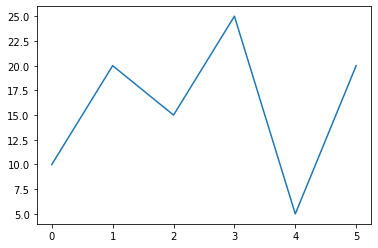

In [ ]:
plt.plot([0, 1, 2, 3, 4, 5], [10, 20, 15, 25, 5, 20]) # plot : 선그래프
plt.show()

In [ ]:
df_kpi.head()

,날짜,체결가
0,2020.11.17,"2,539.15"
1,2020.11.16,"2,543.03"
2,2020.11.13,"2,493.87"
3,2020.11.12,"2,475.62"
4,2020.11.11,"2,485.87"


In [ ]:
df_kpi['날짜'] = df_kpi['날짜'].astype('datetime64')
df_kpi['체결가'] = df_kpi['체결가'].str.replace(',', '').astype('f')
df_kpi.head()

,날짜,체결가
0,2020-11-17,2539.149902
1,2020-11-16,2543.030029
2,2020-11-13,2493.870117
3,2020-11-12,2475.620117
4,2020-11-11,2485.870117


In [ ]:
# 한글 깨짐 해결
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [ ]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm

In [ ]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

In [ ]:
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
fm._rebuild()

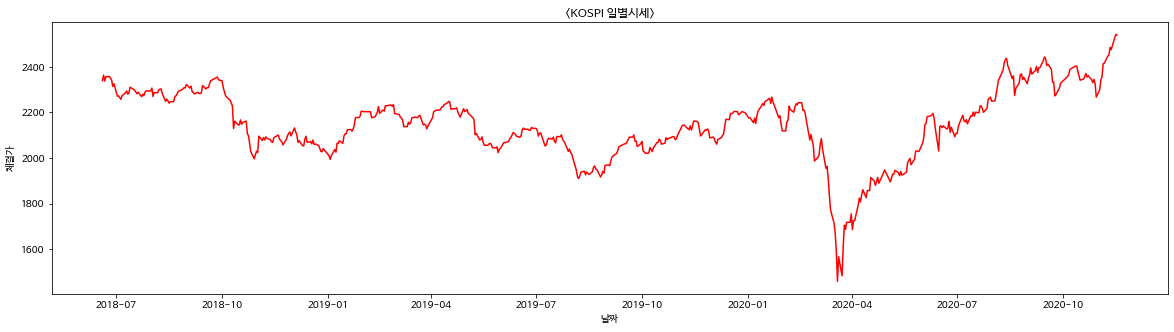

In [ ]:
plt.figure(figsize=[20,5])
plt.plot(df_kpi['날짜'], df_kpi['체결가'], c='red')
plt.title('<KOSPI 일별시세>')
plt.xlabel('날짜')
plt.ylabel('체결가')
plt.show()

In [ ]:
df_kpi.to_excel('kospi.xlsx', index=False)

In [ ]:
df_kospi = pd.read_excel('kospi.xlsx', index_col='날짜')
df_kospi

,체결가
날짜,
2020-11-17,2539.149902
2020-11-16,2543.030029
2020-11-13,2493.870117
2020-11-12,2475.620117
2020-11-11,2485.870117
...,...
2018-06-25,2357.879883
2018-06-22,2357.219971
2018-06-21,2337.830078


## 구글 이미지 가져오기

In [ ]:
# 구글 이미지 가져오기
url = 'https://www.google.com/search?q=%EA%B0%95%EC%95%84%EC%A7%80&newwindow=1&tbm=isch&biw=1920&bih=969&sfr=gws&gbv=1&sei=nWYNX6XcL4y40QTozZeACg'

resp = requests.get(url)
resp

<Response [200]>

In [ ]:
mkdir google_img2

In [ ]:
# format 용법
# 'thumb_1'

for num in range(20):
    print('thumb_{:02}'.format(num))

In [ ]:
soup = BeautifulSoup(resp.content, 'lxml')
img_tags = soup.select('table.GpQGbf td.e3goi img')

for idx, img_tag in enumerate(img_tags):
    resp = requests.get(img_tag['src'])

    with open('google_img2/thumb_{:02}.jpg'.format(idx), 'wb') as f:
        f.write(resp.content)

## 네이버 부동산 정보 가져오기

In [ ]:
import json

In [ ]:
naver_maemul = {'name': [], 'lat':[], 'lon':[], 'addr':[]}
for page in range(1, 6):
    url = 'https://new.land.naver.com/api/search'

    params = {
        'keyword' : '센텀',
        'page' : page
    }

    headers = {
        'Referer': 'https://new.land.naver.com/search?ms=37.3595704,127.105399,16&a=APT:JGC:ABYG&e=RETAIL',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36'
    }

    resp = requests.get(url, params=params, headers=headers)
    resp.text

    # 할필요가 없다.
    # soup = BeautiSoup(resp.content, 'lxml')
    # soup.select('태그 수식어 태그 이름')
    result = json.loads(resp.text) # loads : to Dict / dumps : to JSON

    
    for rslt in result['complexes']:
        naver_maemul['name'].append(rslt['complexName'])
        naver_maemul['lat'].append(rslt["latitude"])
        naver_maemul['lon'].append(rslt["longitude"])
        naver_maemul['addr'].append(rslt["cortarAddress"])
naver_maemul

{'addr': ['부산시 해운대구 재송동',
  '세종시 다정동',
  '부산시 해운대구 반여동',
  '부산시 수영구 민락동',
  '경상남도 김해시 주촌면',
  '세종시 종촌동',
  '부산시 수영구 민락동',
  '부산시 해운대구 반여동',
  '경상남도 김해시 삼계동',
  '경상북도 예천군 호명면',
  '부산시 해운대구 재송동',
  '부산시 해운대구 반여동',
  '경상남도 김해시 주촌면',
  '부산시 강서구 명지동',
  '부산시 해운대구 반여동',
  '부산시 해운대구 반여동',
  '경상남도 창원시 의창구 북면',
  '부산시 강서구 명지동',
  '대구시 서구 평리동',
  '경기도 시흥시 능곡동',
  '세종시 종촌동',
  '부산시 수영구 민락동',
  '부산시 해운대구 재송동',
  '인천시 서구 청라동',
  '부산시 해운대구 우동',
  '부산시 해운대구 재송동',
  '대구시 달서구 진천동',
  '인천시 중구 운서동',
  '부산시 연제구 연산동',
  '부산시 해운대구 재송동',
  '부산시 수영구 민락동',
  '부산시 해운대구 재송동',
  '부산시 해운대구 재송동',
  '전라남도 목포시 상동',
  '세종시 아름동',
  '부산시 해운대구 재송동',
  '부산시 해운대구 우동',
  '부산시 연제구 연산동',
  '부산시 해운대구 반여동',
  '부산시 해운대구 우동',
  '경상남도 창원시 성산구 가음동',
  '경상북도 칠곡군 왜관읍',
  '부산시 수영구 망미동',
  '부산시 해운대구 우동',
  '부산시 해운대구 우동',
  '부산시 해운대구 재송동',
  '강원도 춘천시 약사동',
  '부산시 해운대구 재송동',
  '경기도 시흥시 대야동',
  '부산시 해운대구 반여동',
  '충청남도 서산시 예천동',
  '경기도 화성시 영천동',
  '부산시 해운대구 우동',
  '부산시 해운대구 우동',
  '부산시 해운대구 우동',
  '부산시 해운대구 우동',
  '부산시 해운대구 반여동',
  '부산시 수영

In [ ]:
# "complexName" 
#"latitude"
#"longitude"
# "cortarAddress"

In [ ]:
import pandas as pd

df_naver_maemul = pd.DataFrame(naver_maemul)
df_naver_maemul.to_csv('네이버_부동산.csv', index=False)

In [ ]:
df_naver_maemul.shape

(249, 4)

In [ ]:
df_naver_maemul.tail()

,name,lat,lon,addr
244,무안센텀시티(오),34.992106,126.481915,전라남도 무안군 무안읍
245,센텀팰리스,35.913248,128.822349,경상북도 경산시 하양읍
246,센텀팰리스,35.913247,128.822352,경상북도 경산시 하양읍
247,센텀파크,35.969914,129.409461,경상북도 포항시 남구 오천읍
248,센텀파크디오션2단지,37.879478,128.824624,강원도 강릉시 주문진읍


In [ ]:
df_naver_maemul.describe(include='all')

,name,lat,lon,addr
count,50,50.000000,50.000000,50
unique,50,NaN,NaN,24
top,한화꿈에그린센텀,NaN,NaN,부산시 해운대구 재송동
freq,1,NaN,NaN,10
mean,NaN,35.591381,128.601381,NaN
std,NaN,0.786701,0.857625,NaN
min,NaN,34.806900,126.424946,NaN
25%,NaN,35.178180,128.533184,NaN
50%,NaN,35.194615,129.116552,NaN
75%,NaN,35.691156,129.123530,NaN


In [ ]:
df_naver_maemul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    50 non-null     object 
 1   lat     50 non-null     float64
 2   lon     50 non-null     float64
 3   addr    50 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.7+ KB


## 네이버 댓글 정보 가져오기(웹툰)

In [57]:
comments = []

for page in range(1, 11):
    url = 'https://apis.naver.com/commentBox/cbox/web_naver_list_jsonp.json'

    params = {
    'ticket':'comic', 
    'templateId' : 'webtoon',
    'pool' : 'cbox3',
    '_callback':'jQuery112409943405366233473_1594714803755',
    'lang' : 'ko',
    'country' : 'KR',
    'objectId' : '183559_487', 
    'pageSize' : 15,
    'indexSize' : 10,
    'listType' : 'OBJECT',
    # pageType=default,
    'page' : page,
    "refresh" :'false',
    'sort' : 'NEW',
    '_' : 1594714803759
    }

    header = {
        'user-agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.106 Safari/537.36',
        'referer' : 'https://comic.naver.com/comment/comment.nhn?titleId=183559&no=487'
    }

    resp = requests.get(url, params=params, headers=header)
    # resp
    # resp.text
    # len('jQuery112406728581349859082_1605666374369(')

    dic_result = json.loads(resp.text[42:-2])
    # dic_result

    dic_result['result']['commentList']
    for commentList in dic_result['result']['commentList']:
        # print(commentList['contents'])
        comments.append(commentList['contents'])

In [58]:
comments

['나폴레옹: 내 사전에 신천지말고는없다\n아리스토텔레스:존엄은 신천지를 소유하는데 있지않고 신천지를 누릴자격을 유지하는데 있다\n공자:신천지를 믿지않는자는 살가치가없다\n조지에이드: 당신은 누구십니까? 라고 최초의 인간이 물었다. 그는 이만희교주님이었다. ',
 '나도 손목 다쳐서 수술해보니까 느낀건데 손목은 진짜 잘 안 나음 수술해도 반년이상은 무리절대하면 안 되고 수술 안 할거면 일년은 스트레칭만 해주면서 가급적 무리안하는 방식으로 살아야 나을까 말까임 지금부터 못해도 삼개월은 손에 반깁스하고 쭉 쉬셧으면 하는 바램임 지금 무리하면 죽도밥도 안 됨',
 '백수들만 있나요? 때가되면 할텐데 뭘 죽어라 이것만 기다리고있습니까 기다리는건 좋다쳐도 욕을왜하는지ㅋㅋㅋ할 일이 그렇게도 없나 바쁜세상에',
 '아니 그래서 언제까지 쉴건데요?',
 '아니 휴재를 하시는 건 작가님의 자유고 휴재가 싫으신 분들은 안보시던가 그렇게 욕하면 작가님 멘탈 땜에 더 늦을 수도 있는데;; 이유 있는 비판, 소견을 내시는 분들은 뭐라 하지 않습니다... 다만 무작정 근거 없는 비난을 하시는 분들은 깁게 생각해보시길 바랍니다. ',
 '님들아 이 웹툰이 얼마나 유명한데 얼마나 벌겠어 작가님... 계속 벌어야 해서 완결 하진 않을거야',
 '제대로 휴재한적이 없다는 미친소리는 신의탑 나중에접한 놈이고 지옥열차 때만 하더라도 계단올라가는데 휴재포함6개월 걸렸다 알고 말해라',
 '박근혜 전 대통령님. 온 국민이 대통령님의 석방을 기원하고 있습니다. 조금만 버텨 주십시오.',
 '완결 ㅊㅊ',
 '신의탑이 완결 난지도 벌써 반년이구나.. 초등학생때 부터 보던 인생웹툰이었고 정말 재미있었는데. 아직까지 이정도로 몰입해서 본 웹툰은 없는 것 같다. 지나가는 길에 옛 생각이 나서 댓글 적어봅니다. ',
 '스토리야 보다보면 풀리는 건데 그림  좀 어케해주면 좋겠음.',
 '와 오늘 처음 봤는데 대박이네요... 힘내세요!!',
 '논리와 증거가 있는 상태로 욕하는건 괜찮은데 그냥 무논리로 욕하는 

In [ ]:
import re

result = re.findall('jQuery112409943405366233473_1594714803755\((.+)\);', resp.text)

dic_result = json.loads(result[0])
dic_result # result - commentList -[]- contents
for commentList in dic_result['result']['commentList']:
    print(commentList['contents'])

나폴레옹: 내 사전에 신천지말고는없다
아리스토텔레스:존엄은 신천지를 소유하는데 있지않고 신천지를 누릴자격을 유지하는데 있다
공자:신천지를 믿지않는자는 살가치가없다
조지에이드: 당신은 누구십니까? 라고 최초의 인간이 물었다. 그는 이만희교주님이었다. 
나도 손목 다쳐서 수술해보니까 느낀건데 손목은 진짜 잘 안 나음 수술해도 반년이상은 무리절대하면 안 되고 수술 안 할거면 일년은 스트레칭만 해주면서 가급적 무리안하는 방식으로 살아야 나을까 말까임 지금부터 못해도 삼개월은 손에 반깁스하고 쭉 쉬셧으면 하는 바램임 지금 무리하면 죽도밥도 안 됨
백수들만 있나요? 때가되면 할텐데 뭘 죽어라 이것만 기다리고있습니까 기다리는건 좋다쳐도 욕을왜하는지ㅋㅋㅋ할 일이 그렇게도 없나 바쁜세상에
아니 그래서 언제까지 쉴건데요?
아니 휴재를 하시는 건 작가님의 자유고 휴재가 싫으신 분들은 안보시던가 그렇게 욕하면 작가님 멘탈 땜에 더 늦을 수도 있는데;; 이유 있는 비판, 소견을 내시는 분들은 뭐라 하지 않습니다... 다만 무작정 근거 없는 비난을 하시는 분들은 깁게 생각해보시길 바랍니다. 
님들아 이 웹툰이 얼마나 유명한데 얼마나 벌겠어 작가님... 계속 벌어야 해서 완결 하진 않을거야
제대로 휴재한적이 없다는 미친소리는 신의탑 나중에접한 놈이고 지옥열차 때만 하더라도 계단올라가는데 휴재포함6개월 걸렸다 알고 말해라
박근혜 전 대통령님. 온 국민이 대통령님의 석방을 기원하고 있습니다. 조금만 버텨 주십시오.
완결 ㅊㅊ
신의탑이 완결 난지도 벌써 반년이구나.. 초등학생때 부터 보던 인생웹툰이었고 정말 재미있었는데. 아직까지 이정도로 몰입해서 본 웹툰은 없는 것 같다. 지나가는 길에 옛 생각이 나서 댓글 적어봅니다. 
스토리야 보다보면 풀리는 건데 그림  좀 어케해주면 좋겠음.
와 오늘 처음 봤는데 대박이네요... 힘내세요!!
논리와 증거가 있는 상태로 욕하는건 괜찮은데 그냥 무논리로 욕하는 놈들은 무뇌과 무뇌봉의산가?
보고싶어요..
1년이든2년이든 기다려볼게요
